In [1]:
import tifffile
import spam.DIC
import matplotlib.pyplot as plt
import skimage.filters
import numpy as np
import spam.label
import spam.plotting
import math

In [2]:
#Define the pixel size of the images

pixel_res_um = 3.3
pixel_res_mm = pixel_res_um/1000

In [3]:
#load in data
#the image volume should already be segmented, with each grain individually labelled

labelled = spam.DIC.binning(tifffile.imread("Image.tiff"), 1)

In [4]:
print(np.shape(labelled))

(600, 2232, 2232)


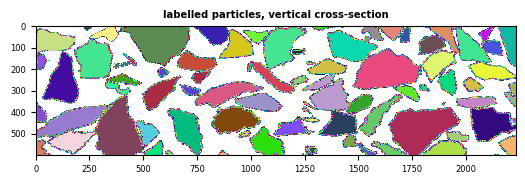

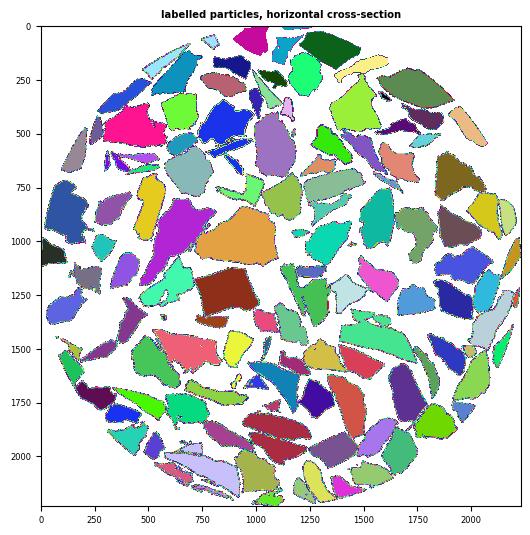

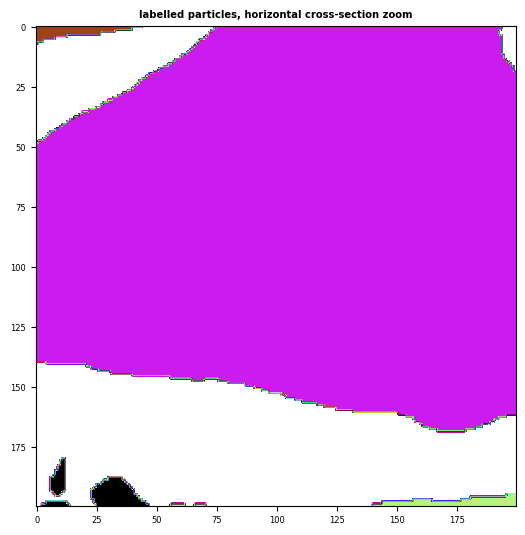

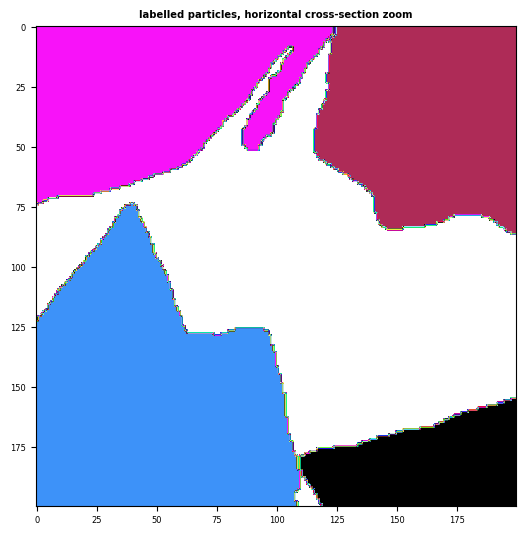

In [5]:
#visualize labelled grains

fig= plt.figure(figsize=(6,12))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.imshow(labelled[:, :, labelled.shape[2]//2], cmap=spam.label.randomCmap)
axes.set_title("labelled particles, vertical cross-section", weight='bold')
plt.show()

fig= plt.figure(figsize=(6,12))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.imshow(labelled[0], cmap=spam.label.randomCmap)
axes.set_title("labelled particles, horizontal cross-section", weight='bold')
plt.show()

fig= plt.figure(figsize=(6,12))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.imshow(labelled[0][400:600, 300:500], cmap=spam.label.randomCmap)
axes.set_title("labelled particles, horizontal cross-section zoom", weight='bold')
plt.show()

fig= plt.figure(figsize=(6,12))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.imshow(labelled[0][1000:1200, 600:800], cmap=spam.label.randomCmap)
axes.set_title("labelled particles, horizontal cross-section zoom", weight='bold')
plt.show()

In [6]:
#find the grains that are on the edges of the image volume
#we don't want to consider these in our analysis
#so remove these labels every time you compute grain properties

labelsOnEdges = spam.label.labelsOnEdges(labelled)

In [9]:
#get grain volumes

volumes = (spam.label.volumes(labelled)*(pixel_res_mm**3))
print(np.shape(volumes))
print('average volume (mm^3): ',np.mean(volumes))



(622,)
average volume (mm^3):  0.07679743064755466


In [10]:
# plt.hist(volumes, bins=32)
# plt.xlabel("Volume (mm^3)", weight='bold')
# plt.ylabel("count", weight='bold')
# plt.title("Distribution of particle volumes", weight='bold')
# plt.show()

In [11]:
# print(volumes)

In [12]:
np.save("FR_1st_3_stacks_volumes.npy", volumes)
# plt.hist(volumes, bins = 30)

(622,)
average eq. sphere diameter (mm):  0.48197944079111005


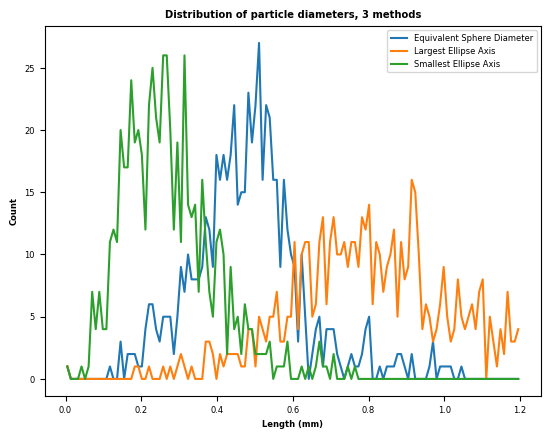

In [13]:
#get equivalent sphere radii

radii = (spam.label.equivalentRadii(labelled)*pixel_res_mm)
print(np.shape(radii))
print('average eq. sphere diameter (mm): ', 2*np.mean(radii))

diameter = 2*radii
ellipseAxes = spam.label.ellipseAxes(labelled)*pixel_res_mm
radiiHist = np.histogram(radii, range=[0, .6], bins=128)
ellipseBig = np.histogram(ellipseAxes[:, 0], range=[0, .6], bins=128)
ellipseSmall = np.histogram(ellipseAxes[:, 2], range=[0, .6], bins=128)
xRange = radiiHist[1][0:-1]+0.5*(radiiHist[1][1]-radiiHist[1][0])
plt.plot(2*xRange, radiiHist[0],    label="Equivalent Sphere Diameter")
plt.plot(2*xRange, ellipseBig[0],   label="Largest Ellipse Axis")
plt.plot(2*xRange, ellipseSmall[0], label="Smallest Ellipse Axis")
plt.xlabel("Length (mm)", weight='bold')
plt.ylabel("Count", weight='bold')
plt.title("Distribution of particle diameters, 3 methods", weight='bold')
plt.legend()
plt.show()



In [14]:
# print(diameter)
# print(diameter.max())

#Save the diameter of grains 
np.save("FR__1st_3_diameter.npy", diameter)

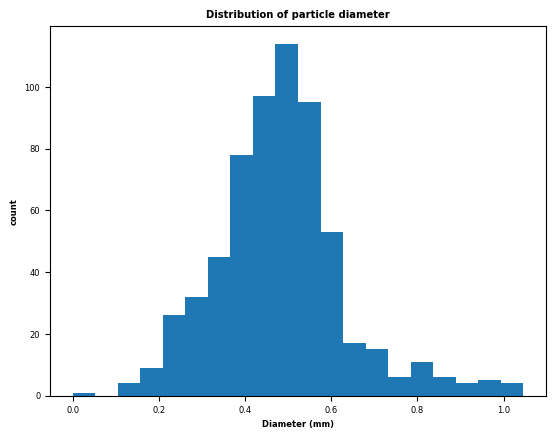

In [15]:
plt.hist(diameter, bins=20)
plt.xlabel("Diameter (mm)", weight='bold')
plt.ylabel("count", weight='bold')
plt.title("Distribution of particle diameter", weight='bold')
plt.show()

In [16]:
# np.save("Radii3c.npy", radii)

np.save("/Volumes/Heart-Shaped Box/LSU Sand/arrays/radii.npy", radii)

Inclusive Graphic Standard Deviation (phi units):  0.44711550588592125


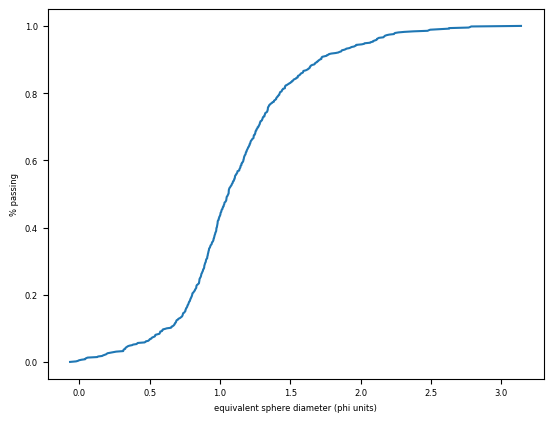

In [17]:
#compute sorting

diameterPhiUnits = -np.log2((2*radii)[np.nonzero(2*radii)])
diameterPhiUnits = np.sort(diameterPhiUnits)
p = np.arange(len(diameterPhiUnits))/(len(diameterPhiUnits)-1)
f = lambda x: np.interp(x, p, diameterPhiUnits)
sorting = ((f(.84)-f(.16))/4)+((f(.95)-f(.05))/6.6)
print('Inclusive Graphic Standard Deviation (phi units): ',sorting)

plt.plot(diameterPhiUnits, p)
plt.xlabel('equivalent sphere diameter (phi units)')
plt.ylabel('% passing')
plt.show()

In [18]:
#Convert labelled into an integer

labelled = labelled.astype(int)

In [19]:
print(labelled.max())

621


In [20]:
#get grain contacts
#Z is coordination number
#see SPAM documentation for more info

contactVolume, Z, contactsTable, contactingLabels = spam.label.labelledContacts(labelled)
print(Z)

[ 0  2  2  5  4  1  2  4  1  1  3  2  6  7  0  5  5  0  5  4  1  4  3  2
  3  6  1  9  3  4  3  1  0  7  7  4  7  2  5  2  2  3  1  4  0  6  6  8
  3  5  0  2  2  2  2  5  6  3  2  5  3  3  4  4  1  1  1  5  1  5  1  2
  2  1  5  6  5  2  2  1  6  1  1  4  4  2  6  5  3  2  3  1  5  0  4  2
  7  3  3  2  4  7  4  4  1  5  8  6  4  3  3  8  2  5  7  8  3  4  7  7
  5  6  5  5  3  7  6  7  7 10  6  4  8  8  7  1  4  5  8  9  3  7  5  5
  6  8  5  6  3  6 12  6  6  6  6  2  9  3  6  3  5  4  2  7  3  7  7  4
  9  5  6  4  6 15  7  5  7  7  2  6  6  4  6  9  5  5  8  4  6  0  2  9
  8  3  4  6  4  6  8  7  4 15  3  9  4  6  6 10 10  9 17  9 12  4  3  2
  5  5  4  9  6  3  4  4  5  7  6  5  4 10  5  2 11  8  5  8  6  7  2  6
  8  8  8  5  8 10  8  6  4 13  4  8  5  2  8  7  8 14  7  6  2  3  3  2
  9  1  5  9  2 16  5  5  4 11  6  7  8  7 10 10  5 10  6  2  3 10  5  6
  6 11  2  7  5  5  7 13  4  7  8  6  7 10  6  5  4  7  6  7 10  4  4  6
  5  1  6  6  4 10  8  4  5  2  8  6  2  8  5  6  5

In [21]:
print(np.shape(Z))
print("Mean CN: ", np.mean(Z))

(622,)
Mean CN:  4.990353697749196


In [22]:
np.save("FR__1st_3__Z.npy", Z)

In [23]:
print("SD CN: ", np.std(Z))

SD CN:  2.7698253866129456


Text(0, 0.5, 'Coordination Number')

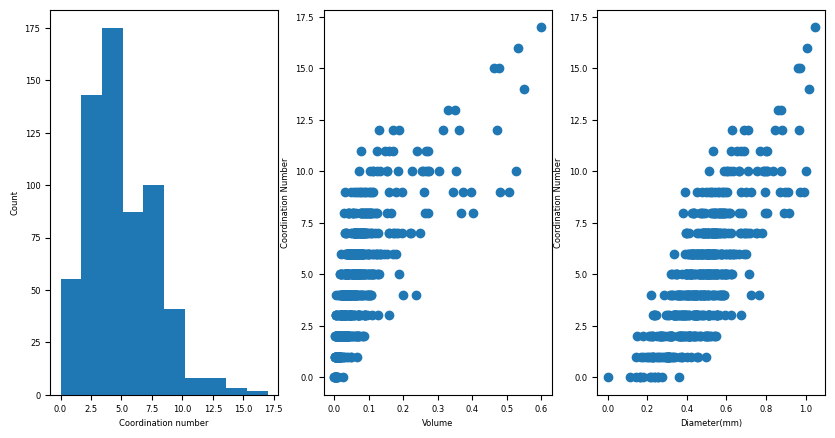

In [24]:
#Plot coordination number against the Diameter(mm)


fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0].hist(Z)
ax[0].set_xlabel("Coordination number")
ax[0].set_ylabel("Count")

ax[1].scatter(volumes,Z)
ax[1].set_xlabel("Volume")
ax[1].set_ylabel("Coordination Number")

ax[2].scatter(diameter,Z)
ax[2].set_xlabel("Diameter(mm)")
ax[2].set_ylabel("Coordination Number")


In [ ]:
#compute sphericities
#requires computing bounding boxes and centers of mass
#may take a while

boundingBoxes = spam.label.boundingBoxes(labelled)
centresOfMass = spam.label.centresOfMass(labelled, boundingBoxes)
sphericities = spam.label.trueSphericity(labelled, boundingBoxes, centresOfMass, minVol=0)
#sphericities = np.delete(sphericities, labelsOnEdges)
print(np.shape(sphericities))
print
print('Avg sphericity: ', np.mean(sphericities))

In [ ]:
print(sphericities)

In [ ]:
np.save("sphericities2a.npy", sphericities)